## Linear Regression Implementation using numpy

In linear regression we want to model the relationship between a **scalar dependent variable** $y$ and one or more **independent (predictor) variables** $\boldsymbol{x}$.

**Given:** 
- dataset $\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(m)}, y^{(m)})\}$
- with $\boldsymbol{x}^{(i)}$ being a $d-$dimensional vector $\boldsymbol{x}^i = (x^{(i)}_1, ..., x^{(i)}_d)$
- $y^{(i)}$ being a scalar target variable

The linear regression model can be interpreted as a very **simple neural network:**
- it has a real-valued weight vector $\boldsymbol{w}= (w^{(1)}, ..., w^{(d)})$
- it has a real-valued bias $b$
- it uses the identity function as its activation function

![title](figures/linear_regression.jpg)

### Training
A linear regression model can be trained using either  
a) gradient descent or  
b) the normal equation (closed-form solution): $\boldsymbol{w} = (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{y}$ 

where $\boldsymbol{X}$ is a matrix of shape $(m, n_{features})$ that holds all training examples.  
The normal equation requires computing the inverse of $\boldsymbol{X}^T \boldsymbol{X}$. The computational complexity of this operation lies between $O(n_{features}^{2.4}$) and $O(n_{features}^3$) (depending on the implementation).
Therefore, if the number of features in the training set is large, the normal equation will get very slow. 

* * *
The training procedure of a linear regression model has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step 0: ** 

Initialize the weight vector and bias with zeros (or small random values)

**OR**

Compute the parameters directly using the normal equation
* * *

**Step 1: ** (Only needed when training with gradient descent)

Compute a linear combination of the input features and weights. This can be done in one step for all training examples, using vectorization and broadcasting:
$\boldsymbol{\hat{y}} = \boldsymbol{X} \cdot \boldsymbol{w} + b $

where $\boldsymbol{X}$ is a matrix of shape $(m, n_{features})$ that holds all training examples, and $\cdot$ denotes the dot product.
* * *

**Step 2: ** (Only needed when training with gradient descent)

Compute the cost (mean squared error) over the training set:

$J(\boldsymbol{w},b) = \frac{1}{m} \sum_{i=1}^m \Big(\hat{y}^{(i)} - y^{(i)} \Big)^2$
* * *

**Step 3: **  (Only needed when training with gradient descent)

Compute the partial derivatives of the cost function with respect to each parameter:

$ \frac{\partial J}{\partial w_j} = \frac{2}{m}\sum_{i=1}^m \Big( \hat{y}^{(i)} - y^{(i)} \Big) x^{(i)}_j$

$ \frac{\partial J}{\partial b} = \frac{2}{m}\sum_{i=1}^m \Big( \hat{y}^{(i)} - y^{(i)} \Big)$


The gradient containing all partial derivatives can then be computed as follows: 

$\nabla_{\boldsymbol{w}} J = \frac{2}{m} \boldsymbol{X}^T \cdot \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big)$

$\nabla_{\boldsymbol{b}} J = \frac{2}{m} \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big)$
* * *

**Step 4: ** (Only needed when training with gradient descent)

Update the weight vector and bias:

$\boldsymbol{w} = \boldsymbol{w} - \eta \, \nabla_w J$  

$b = b - \eta \, \nabla_b J$  


where $\eta$ is the learning rate.

## Linear Regression Implementation

In [1]:
import numpy as np
class LinearRegression:
    
    def fit(self, X, y, lr = 0.001, epochs=10000, verbose=1, batch_size=1):
        X = self.add_bias(X)
        self.weights = np.zeros(len(X[0]))
        for i in range(epochs):
            idx = np.random.choice(len(X), batch_size) 
            X_batch, y_batch =  X[idx], y[idx]
            self.weights -= lr * self.get_gradient(X_batch, y_batch)
            if i % 1000 == 0 and verbose: 
                print('Iterations: %d - Error : %.4f' %(i, self.get_loss(X,y)))
                
    def predict(self, X):
        return self.predict_(self.add_bias(X))
    
    def get_loss(self, X, y):
        return np.mean((y - self.predict_(X)) ** 2)
    
    def predict_(self, X):
        return np.dot(X,self.weights)
    
    def add_bias(self,X):
        return np.insert(X, 0, np.ones(len(X)), axis=1)
        
    def get_gradient(self, X, y):
        return -1.0 * np.dot(y - self.predict_(X), X) / len(X)
    
    def evaluate(self, X, y):
        return self.get_loss(self.add_bias(X), y)

## Implementation Evaluation

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train, lr=0.1, batch_size=len(diabetes_X_train))

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

Iterations: 0 - Error : 29468.6469
Iterations: 1000 - Error : 5222.0489
Iterations: 2000 - Error : 4763.5437
Iterations: 3000 - Error : 4468.1709
Iterations: 4000 - Error : 4280.3568
Iterations: 5000 - Error : 4161.9211
Iterations: 6000 - Error : 4086.6240
Iterations: 7000 - Error : 4039.2490
Iterations: 8000 - Error : 4008.7785
Iterations: 9000 - Error : 3989.7663


('Coefficients: \n', array([152.84030657, 840.69507178]))
Mean squared error: 2675.46
Variance score: 0.45


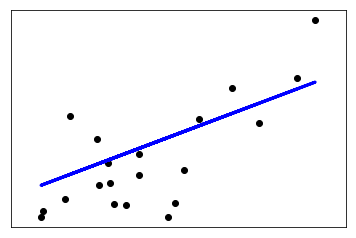

In [3]:

# The coefficients
print('Coefficients: \n', regr.weights)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

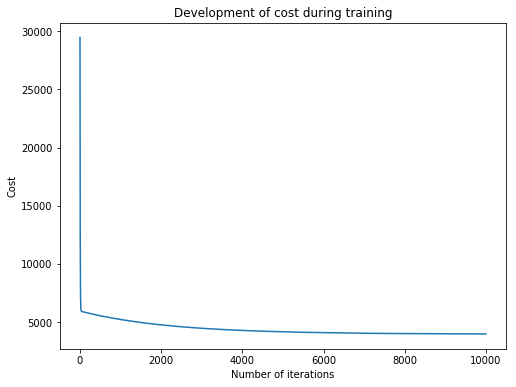

In [5]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(10000), regr.loss)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

## Another Dataset

Iterations: 0 - Error : 25.4396
Iterations: 1000 - Error : 3.3716
Iterations: 2000 - Error : 2.0538
Iterations: 3000 - Error : 1.6314
Iterations: 4000 - Error : 1.5079
Iterations: 5000 - Error : 1.4654
Iterations: 6000 - Error : 1.4769
Iterations: 7000 - Error : 1.4498
Iterations: 8000 - Error : 1.4945
Iterations: 9000 - Error : 1.4789


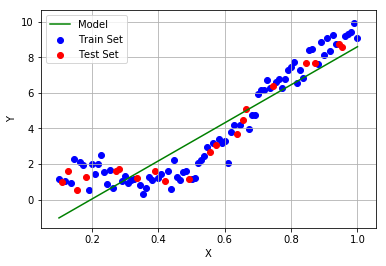

In [6]:
# Generating our data.

X = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
Y = np.sin(X) + 0.1 * np.power(X, 2) + 0.5 * np.random.randn(100, 1)
X /= np.max(X)

X = np.hstack((np.ones_like(X), X))

order = np.random.permutation(len(X))
portion = 20

"""
    Split your data into train and test using the order and permutation variable
"""
test_idx = order[:portion]
train_idx = order[portion:]

train_x = X[train_idx]
train_y = Y[train_idx]

test_x = X[test_idx]
test_y = Y[test_idx]

train_y = train_y.reshape(-1,)

reg = LinearRegression()
reg.fit(train_x, train_y, lr=0.01)

plt.plot(X[:,1], reg.predict(X), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Visualize error

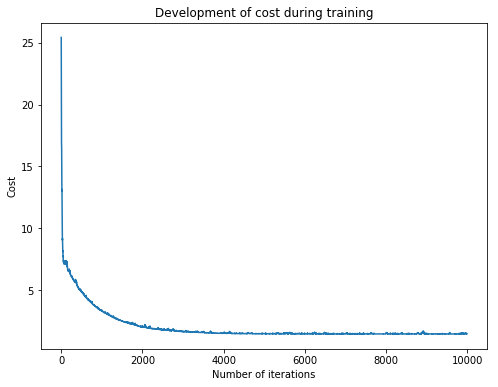

In [7]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(10000), reg.loss)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()